In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [9]:
coverage_df = coverage_df.drop(["Tree val", "Naive"], axis=1)
coverage_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667
2,0.833333,0.666667,0.833333,0.666667,1.000000,0.833333
3,1.000000,1.000000,1.000000,0.833333,0.833333,0.800000
4,1.000000,0.666667,0.833333,1.000000,0.833333,0.833333
...,...,...,...,...,...,...
45,0.666667,0.833333,1.000000,1.000000,1.000000,0.833333
46,1.000000,1.000000,0.833333,1.000000,0.833333,0.800000
47,0.833333,1.000000,0.833333,0.833333,0.666667,1.000000
48,0.833333,1.000000,0.833333,1.000000,1.000000,1.000000


In [10]:
length_df = length_df.drop(["Tree val", "Naive"], axis=1)
length_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,2.889775,5.372822,4.009246,3.431531,3.072611,2.845574
1,3.145553,5.435727,4.007551,3.446784,3.069648,2.854318
2,2.499135,5.461645,4.112190,3.473015,3.106646,2.889012
3,2.312442,5.468833,3.628195,3.438481,3.087500,2.592626
4,2.397563,5.588898,4.115610,3.482478,3.143349,2.881332
...,...,...,...,...,...,...
45,2.568661,5.426249,4.133442,3.470935,3.133045,2.920736
46,3.330254,5.053456,4.049378,3.432635,3.091016,2.611652
47,2.944611,5.567932,4.092186,3.494690,3.129667,3.066383
48,3.287874,5.870906,4.023121,3.411060,3.063860,2.840237


In [11]:
MSE_df = MSE_df.drop(["Tree val", "Naive"], axis=1)
MSE_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,4.842293,5.109435,5.030253,5.193112,5.753346,5.783618
1,5.675739,6.396180,5.783634,6.717047,6.777495,6.570339
2,5.726847,5.733820,5.465551,5.562965,5.535842,6.030699
3,5.026594,5.123540,5.790886,5.415303,5.495061,5.613526
4,4.533394,4.454522,4.833265,4.518096,5.048684,4.554895
...,...,...,...,...,...,...
45,4.535757,4.955706,4.884449,5.414933,5.265487,5.537638
46,6.231941,4.804227,4.963738,6.595770,5.540960,5.495167
47,6.085677,5.493958,5.315040,5.649354,5.990824,7.823227
48,7.901815,7.923026,7.215574,7.133447,6.726711,8.221799


In [12]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            if len_baseline_key:
                axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(0,MSE_lim)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 1.0       0.900943
UV_0.1    0.901524
UV_0.2    0.906200
UV_0.3    0.892171
UV_0.4    0.897438
UV_0.5    0.891095
dtype: float64
Length :
 1.0       3.332895
UV_0.1    5.504646
UV_0.2    4.042862
UV_0.3    3.449224
UV_0.4    3.094554
UV_0.5    2.865809
dtype: float64
MSE :
 1.0       5.181762
UV_0.1    5.338588
UV_0.2    5.457186
UV_0.3    5.524815
UV_0.4    5.644790
UV_0.5    5.733890
dtype: float64


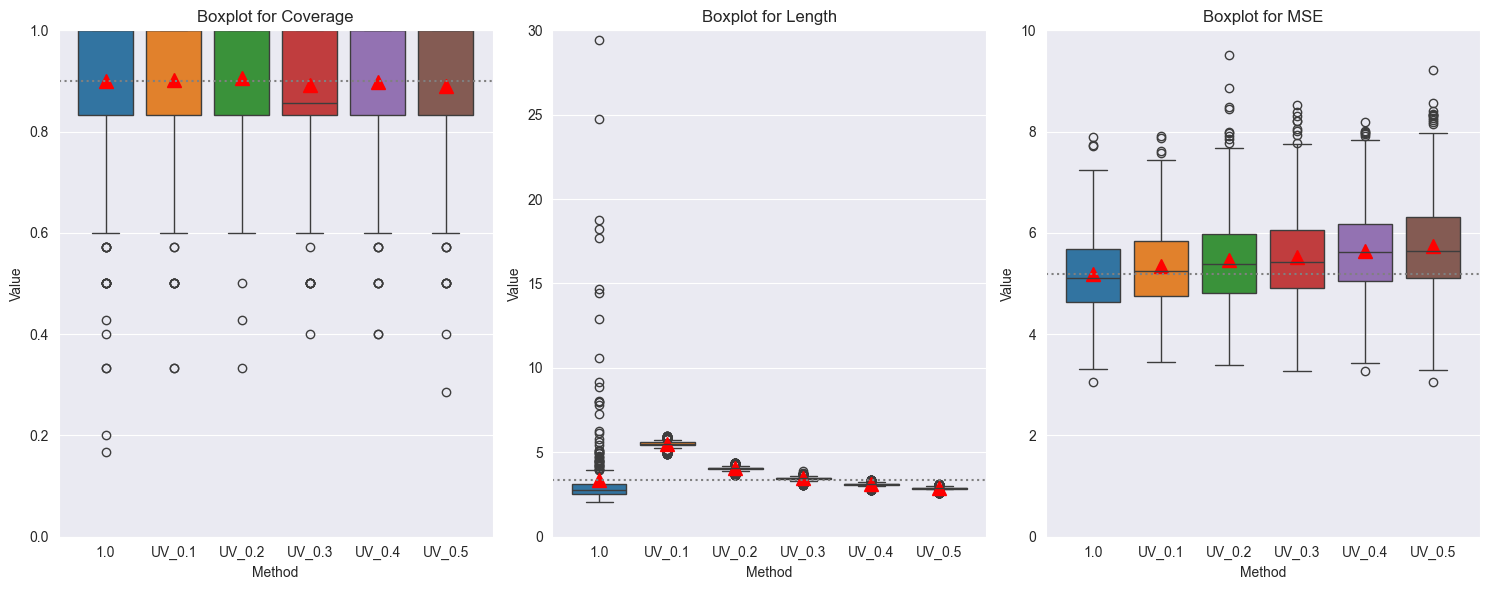

In [15]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=30,
         len_baseline_key=1.0,
         MSE_baseline_key=1.0,
         metrics=["Coverage", "Length", "MSE"])